In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#ucitavamo bazu sa rekodovanim ishodom
df = pd.read_excel("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/adhdrekodovanishod.xlsx")
df.head()

,redni broj,grupa,datum rodjenja,datum pregleda,broj protokola,psihijatrijski nalaz,psihicki status,logopedski status,glu,fe,...,beta 3mean,adhd skor,adhd (roditelj),trog II,arq (dst-j),dyslexia (roditelj),iqv(revisk),iqnv(revisk),iqt(revisk),zaključak i predlog
0,1,1,14.10.2007.,3.9.2018.,3001/18,1,1,2,4.7,20.2,...,3.29,89,2,9.11,0.27,2,110,112,111,ADHD
1,2,1,23.2.2010.,26.9.2018.,3002/18,1,1,2,4.8,18.7,...,3.39,87,1,5.30,0.36,2,84,100,91,ADHD
2,3,1,24.10.2008.,3.9.2018.,3003/18,1,1,2,4.9,29.1,...,3.44,102,2,6.60,0.45,2,120,122,121,ADHD
3,4,1,27.2.2008.,3.9.2018.,3004/18,2,1,1,5.3,14.9,...,4.57,91,1,13.00,1.18,1,101,126,123,Mešoviti
4,5,2,5.3.2008.,3.9.2018.,3005/18,3,1,2,4.9,13.1,...,3.92,60,1,11.00,0.27,2,123,125,124,Tipični


In [18]:
df = df.drop(['redni broj'], axis=1)

In [4]:
df1 = df.groupby('zaključak i predlog').mean()
df1.head()

,grupa,psihijatrijski nalaz,psihicki status,logopedski status,theta/beta ratio,theta mean,low alpha,high alpha,alpha mean,smr mean,beta 1 mean,beta 2 mean,beta 3mean,adhd skor,adhd (roditelj),dyslexia (roditelj),iqv(revisk),iqnv(revisk),iqt(revisk)
zaključak i predlog,,,,,,,,,,,,,,,,,,,
adhd,1.000000,1.206897,1.0,1.982759,5.575000,17.671379,12.372931,8.214310,14.984828,6.371552,5.195517,5.052586,3.936897,100.896552,1.741379,1.758621,102.706897,105.879310,104.275862
mešovita dijagnoza,1.020833,2.791667,1.0,1.416667,5.976875,18.162708,11.451042,7.375000,13.826667,6.129792,5.143958,14.252292,3.897708,81.041667,1.375000,1.354167,97.104167,106.208333,101.708333
tipičan,2.000000,2.984848,1.0,2.000000,5.092576,15.528364,10.442121,8.059091,12.483939,6.089394,5.233788,5.130152,4.220000,61.500000,1.075758,1.954545,108.878788,111.393939,110.166667


In [31]:
df1.to_excel("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/deskriptivna rekodovan ishod.xlsx",sheet_name='Sheet1')

In [19]:
df.groupby('zaključak i predlog').count()

,grupa,datum rodjenja,datum pregleda,broj protokola,psihijatrijski nalaz,psihicki status,logopedski status,glu,fe,feritin,...,beta 2 mean,beta 3mean,adhd skor,adhd (roditelj),trog II,arq (dst-j),dyslexia (roditelj),iqv(revisk),iqnv(revisk),iqt(revisk)
zaključak i predlog,,,,,,,,,,,,,,,,,,,,,
adhd,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
mešovita dijagnoza,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
tipičan,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66


In [28]:
df=df.drop(['grupa', 'redni broj','datum rodjenja', 'datum pregleda', 'broj protokola', 'psihijatrijski nalaz', 'psihicki status', 'logopedski status'],axis=1)

In [29]:
df.describe()

,glu,fe,Hcy,TSH,FT4,b12,vitamin d,theta/beta ratio,theta mean,low alpha,...,beta 2 mean,beta 3mean,adhd skor,adhd (roditelj),trog II,arq (dst-j),dyslexia (roditelj),iqv(revisk),iqnv(revisk),iqt(revisk)
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,5.219593,15.586279,7.808547,40.457401,13.111401,411.050000,66.536279,5.502035,16.986174,11.374767,...,7.649709,4.034593,80.238372,1.383721,7.443140,0.909128,1.720930,103.511628,108.087209,105.819767
std,2.403087,5.815902,3.093493,348.549734,3.043491,185.006847,40.508427,1.685553,4.061560,4.915577,...,34.022253,0.821744,26.649910,0.555011,2.789832,0.650206,0.449852,13.908005,13.995340,12.375559
min,3.200000,4.400000,0.260000,0.103000,8.370000,91.000000,15.400000,2.720000,8.700000,4.800000,...,1.710000,2.230000,0.000000,1.000000,4.000000,0.000000,1.000000,67.000000,83.000000,90.000000
25%,4.800000,11.000000,6.300000,1.996750,11.590000,265.500000,51.000000,4.355000,14.305000,8.155000,...,4.277500,3.465000,63.500000,1.000000,5.300000,0.360000,1.000000,91.000000,97.000000,95.000000
50%,5.000000,14.700000,7.105000,2.601000,12.340000,377.500000,63.760000,5.180000,16.620000,9.770000,...,4.900000,3.905000,83.000000,1.000000,6.600000,0.765000,2.000000,102.000000,106.000000,105.000000
75%,5.300000,18.950000,8.625000,3.070250,14.300000,540.350000,75.000000,6.435000,18.940000,13.450000,...,5.652500,4.500000,100.500000,2.000000,9.110000,1.270000,2.000000,113.250000,118.250000,114.000000
max,36.000000,40.300000,32.700000,3575.000000,40.790000,918.600000,529.300000,16.060000,34.280000,31.750000,...,451.000000,6.900000,126.000000,3.000000,13.000000,3.000000,2.000000,139.000000,145.000000,140.000000


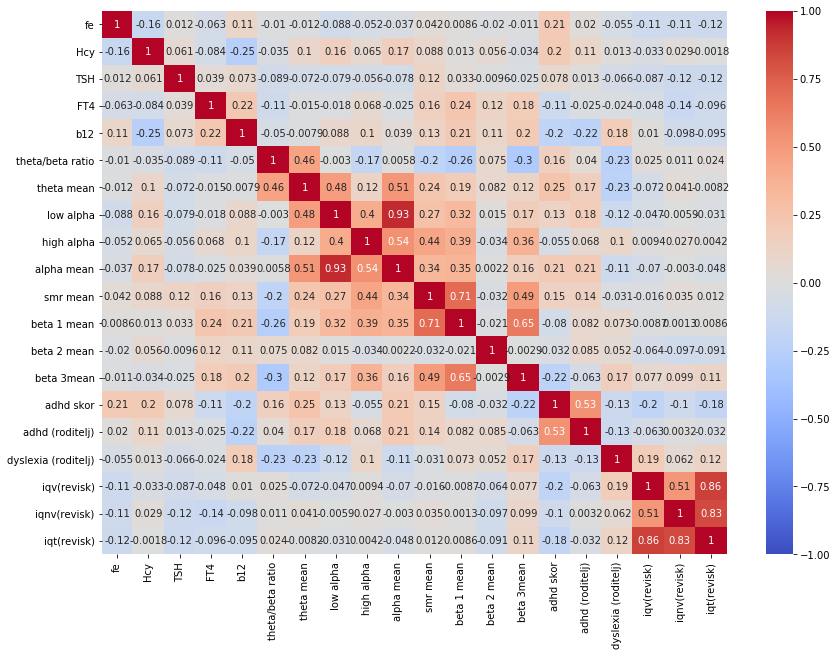

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
fig.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/heatmap_biovarijable1.png")

In [19]:
#sns_plot = sns.pairplot(df, hue='zaključak i predlog')
#sns_plot.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/rekodovanpairplot.png")

In [3]:
hormoni = df[['glu','fe', 'feritin', 'Hcy', 'TSH', 'FT4', 'b12', 'zaključak i predlog']]

In [4]:
hormoni.dtypes

glu                    float64
fe                     float64
feritin                float64
Hcy                    float64
TSH                    float64
FT4                    float64
b12                    float64
zaključak i predlog     object
dtype: object

In [48]:
hormoni.iloc[:, :-1]

,glu,fe,feritin,Hcy,TSH,FT4,b12
0,4.7,20.2,60.1,7.1,4.094,11.33,263.0
1,4.8,18.7,60.1,11.5,4.941,14.98,314.0
2,4.9,29.1,37.0,6.0,1.822,13.03,305.0
3,5.3,14.9,34.0,8.7,1.705,10.59,221.0
4,4.9,13.1,57.1,3.0,2.906,13.42,384.0
...,...,...,...,...,...,...,...
167,5.0,12.1,22.0,7.0,1.900,19.60,482.0
168,5.6,10.7,30.1,5.9,2.100,18.40,356.0
169,4.8,12.0,16.7,6.8,1.660,14.23,622.0
170,5.1,11.0,28.9,6.2,2.200,17.00,678.0


In [9]:
#scaler = StandardScaler()
#scaler.fit(hormoni.iloc[:, :-1])
#scaled_features = scaler.fit_transform(hormoni[:, :-1])

In [ ]:
#hormoni_feat = pd.DataFrame(scaled_features,columns=hormoni.columns)
#hormoni_feat.head()

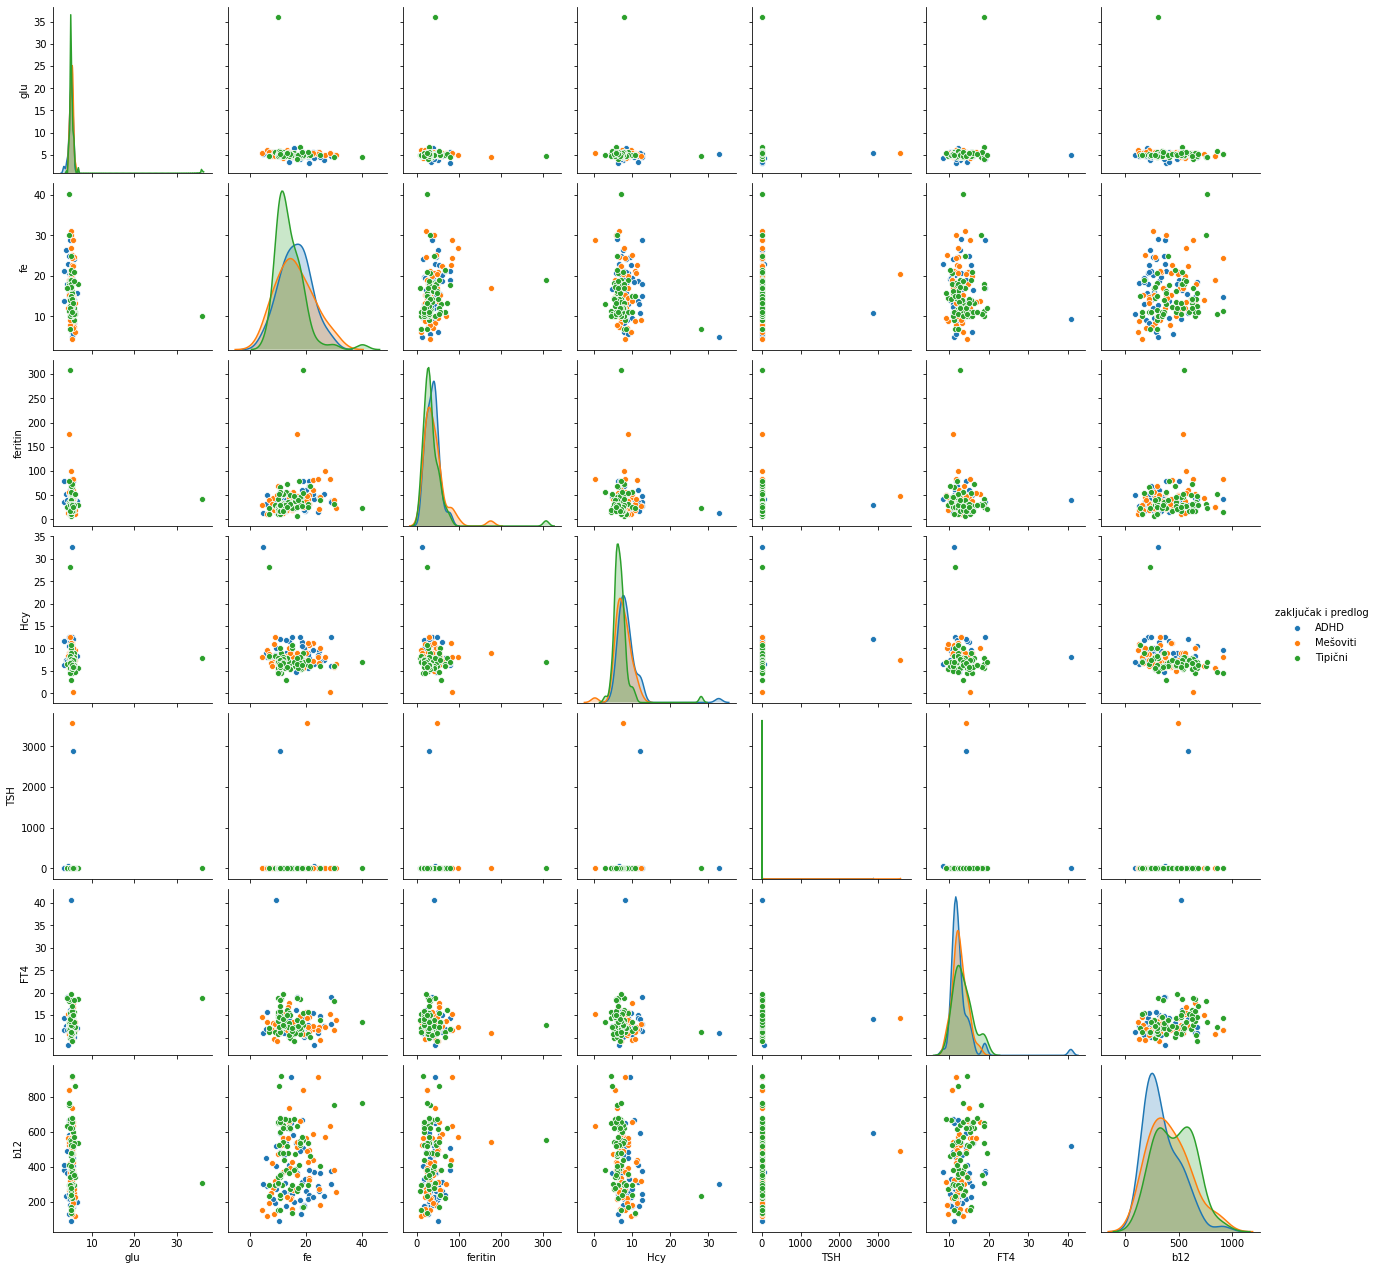

In [8]:
#nas zanima kako se prediktori razlikuju za ucenike koji imaju ADHD, koji nemaju (tipicni), i mesovitih
#Na grafikonima vidimo da postoji puno ekstremnih vrednosti (outlajera) koje remete trendove i koje moraju da se provere
plot = sns.pairplot(hormoni, hue="zaključak i predlog")
plot.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/hormoni_triishoda.png")

In [10]:
talasi = df[['theta/beta ratio','theta mean','low alpha','high alpha', 'alpha mean', 'smr mean', 'beta 1 mean', 'beta 2 mean', 'beta 3mean', 'zaključak i predlog']]

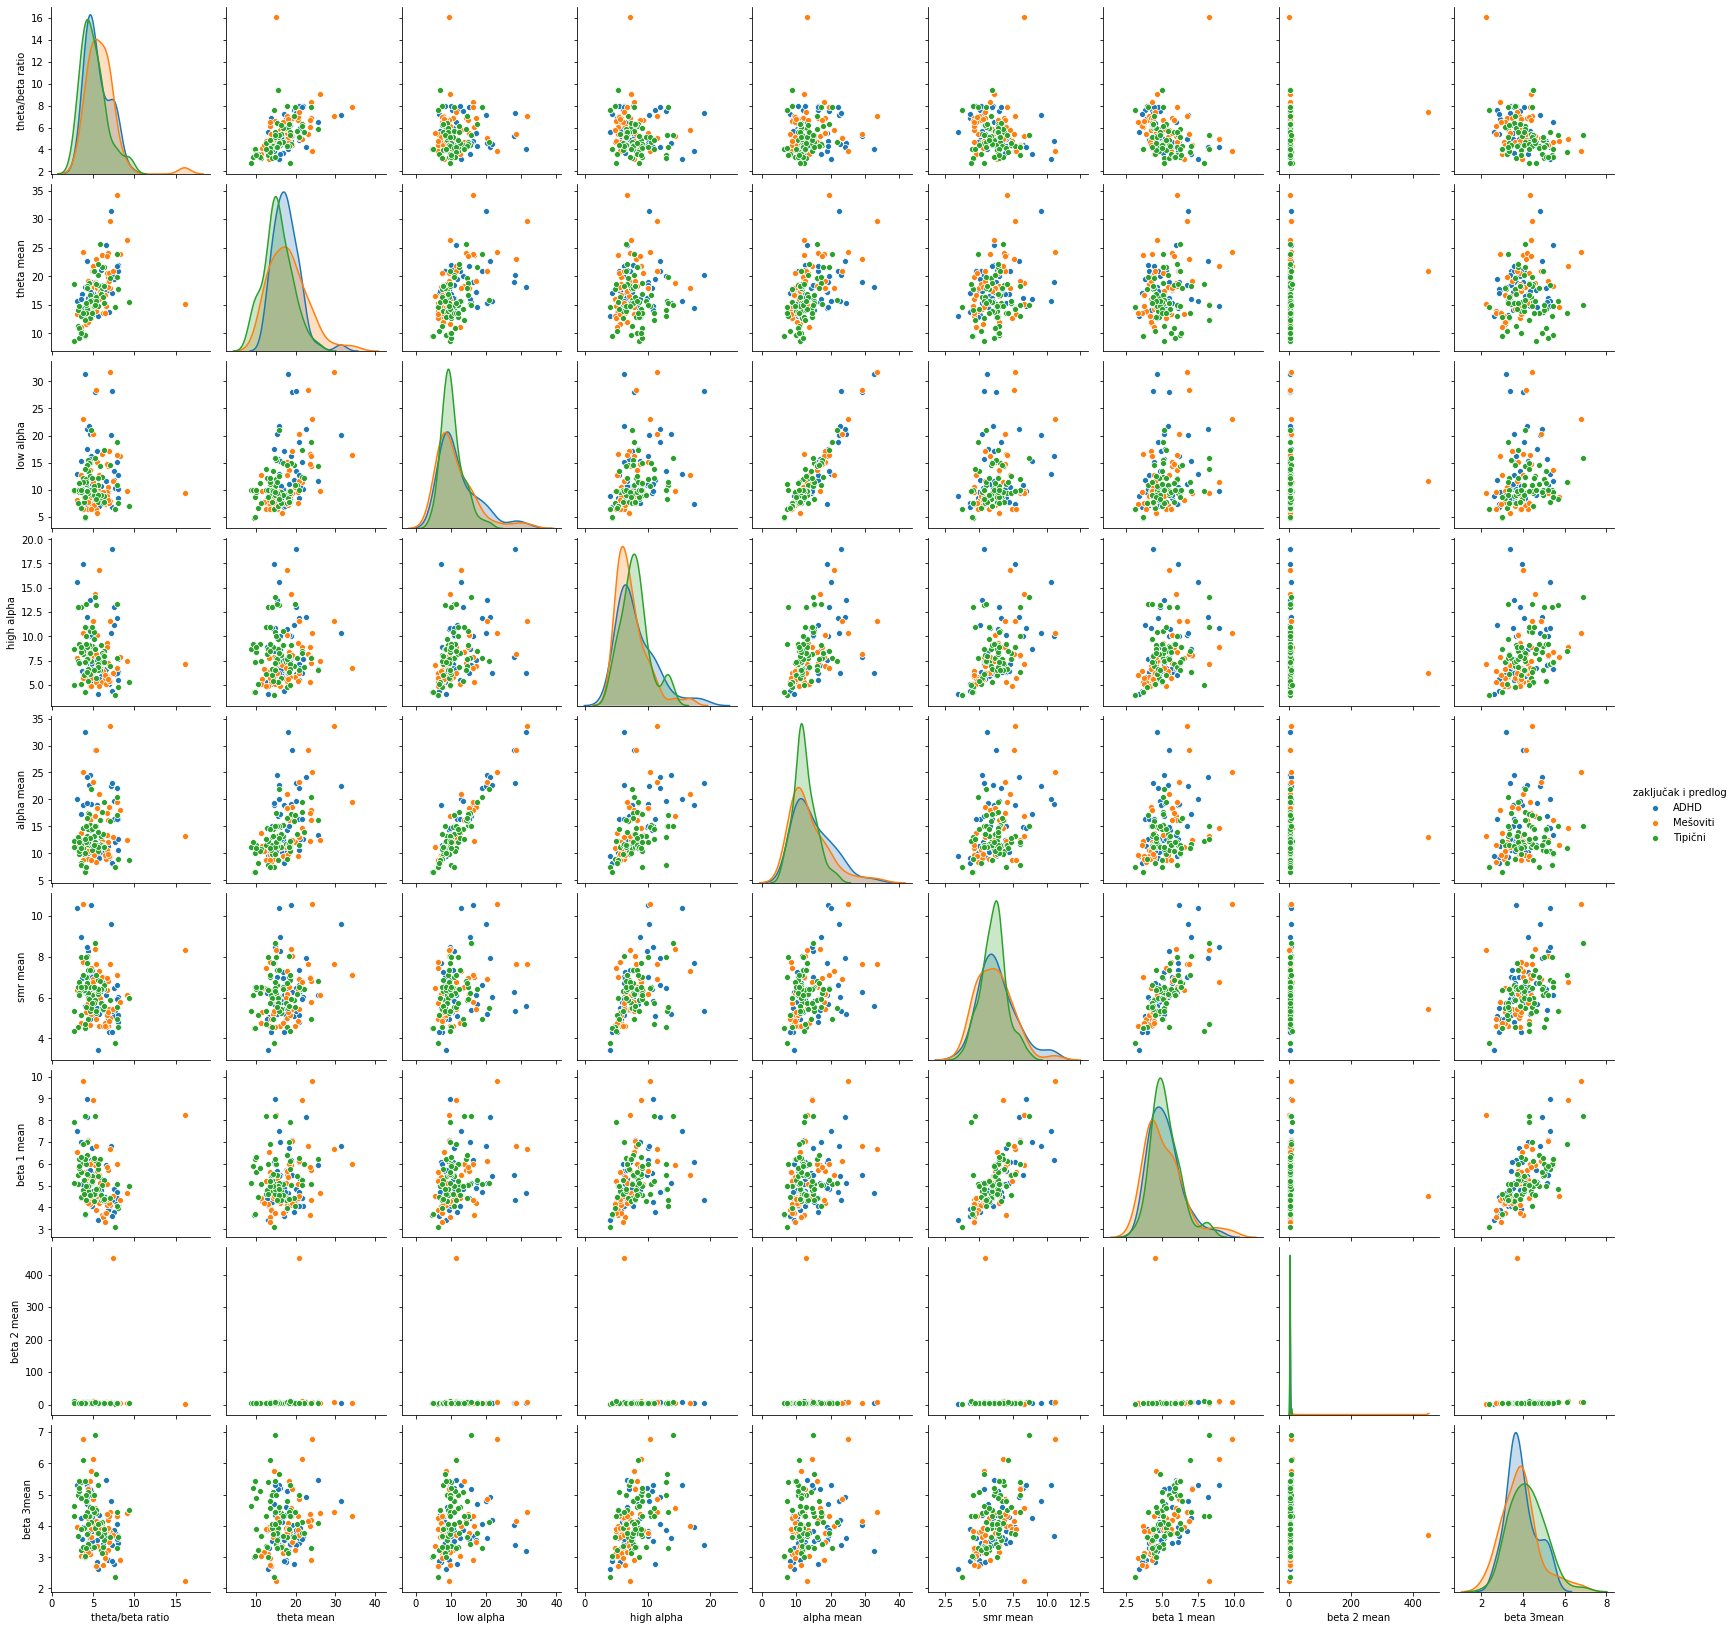

In [13]:
plot_talasi = sns.pairplot(talasi, hue="zaključak i predlog")
plot_talasi.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/talasi_triishoda.png")

In [16]:
kognicija = df[['adhd skor', 'trog II', 'arq (dst-j)','iqv(revisk)', 'iqnv(revisk)', 'iqt(revisk)', 'zaključak i predlog']]

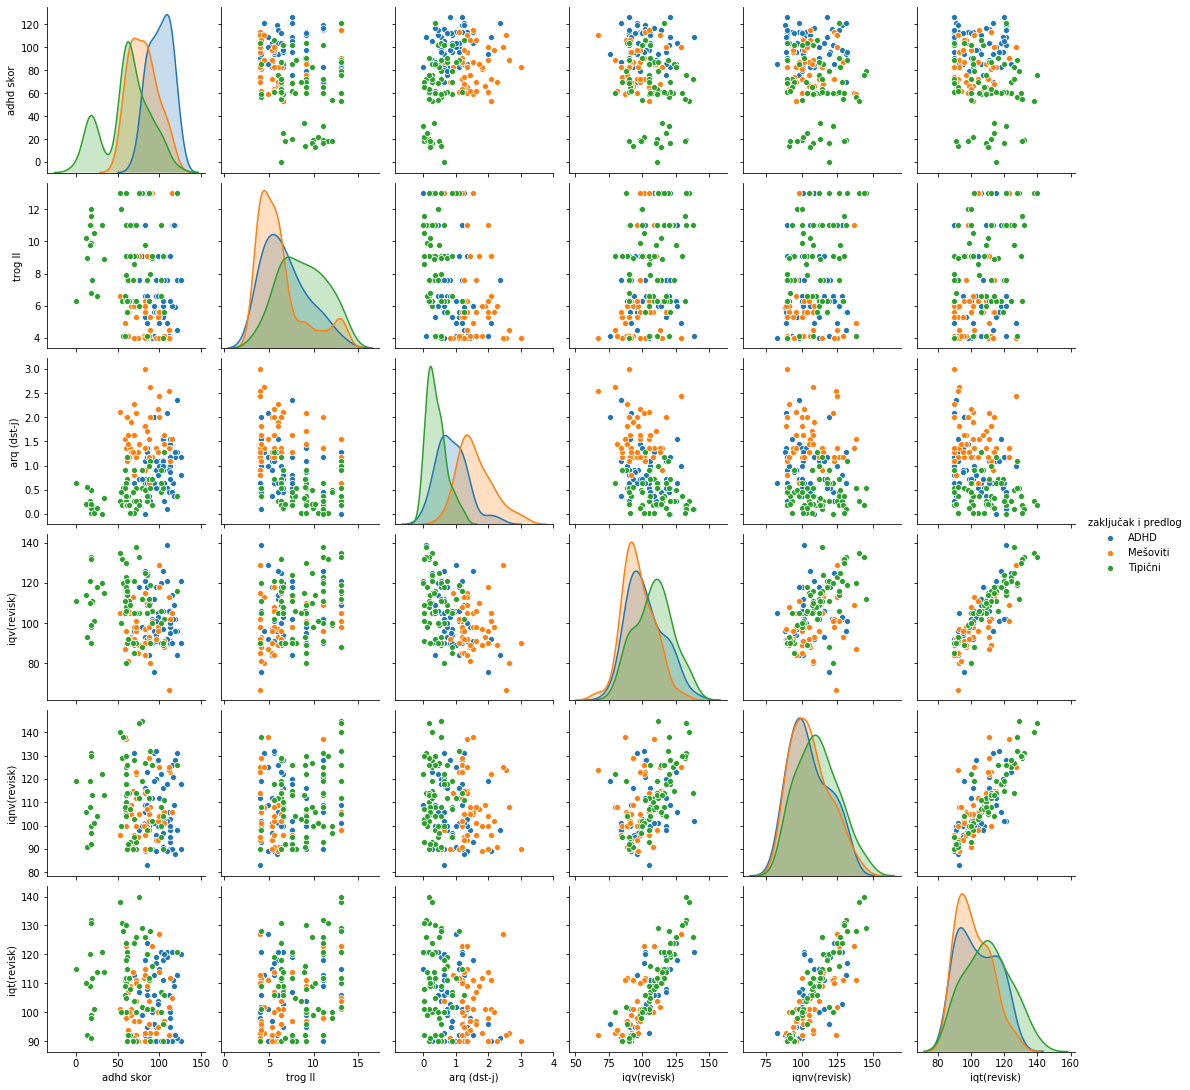

In [17]:
plot_kognicija = sns.pairplot(kognicija, hue="zaključak i predlog")
plot_kognicija.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/kognicija_triishoda.png")

In [18]:
#ucitavamo bazu sa izvornim ishodom
dfi = pd.read_excel("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/adhd.xlsx")

In [19]:
dfi = dfi.drop(['redni broj'], axis=1)

In [20]:
dfi1 = dfi.groupby('zaključak i predlog').mean()
dfi1

,grupa,psihijatrijski nalaz,psihicki status,logopedski status,glu,fe,Hcy,TSH,FT4,b12,...,smr mean,beta 1 mean,beta 2 mean,beta 3mean,adhd skor,adhd (roditelj),dyslexia (roditelj),iqv(revisk),iqnv(revisk),iqt(revisk)
zaključak i predlog,,,,,,,,,,,,,,,,,,,,,
disleksija/add,1.000000,1.000000,1.0,3.000000,5.410000,28.780000,0.260000,3.080000,15.240000,635.300000,...,5.350000,4.540000,6.560000,5.750000,87.000000,2.000000,2.000000,111.000000,98.000000,104.000000
add,1.000000,2.000000,1.0,1.888889,5.055556,17.031111,8.303333,2.510778,11.863333,296.344444,...,6.577778,5.431111,5.351111,4.027778,97.666667,1.333333,1.888889,101.444444,101.666667,101.555556
add/disleksija,1.111111,2.111111,1.0,2.777778,5.095556,17.247778,7.828889,2.627667,13.302333,558.055556,...,6.826667,5.892222,54.662222,4.215556,88.777778,1.555556,1.444444,98.000000,104.222222,102.333333
adhd,1.000000,1.061224,1.0,2.000000,4.940816,16.331224,8.909796,62.393469,13.131429,356.153061,...,6.333673,5.152245,4.997755,3.920204,101.489796,1.816327,1.734694,102.938776,106.653061,104.775510
disleksija,1.000000,3.000000,1.0,1.000000,5.088571,16.166857,7.719714,104.954286,12.421714,388.105714,...,5.965429,4.969143,4.862857,3.782857,78.314286,1.228571,1.314286,97.028571,106.885714,101.771429
disleksija/add,1.000000,3.000000,1.0,1.666667,5.433333,10.200000,8.433333,4.035000,13.190000,242.333333,...,6.216667,5.140000,5.130000,3.666667,87.666667,2.333333,1.333333,90.666667,107.000000,98.333333
tipičan,2.000000,2.984848,1.0,2.000000,5.522727,14.346667,7.053788,2.523667,13.570606,463.840909,...,6.089394,5.233788,5.130152,4.220000,61.500000,1.075758,1.954545,108.878788,111.393939,110.166667


In [37]:
dfi1.to_excel("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/deskriptivna izvorni ishod.xlsx",sheet_name='Sheet1')

In [38]:
dfi.groupby('zaključak i predlog').count()

,grupa,datum rodjenja,datum pregleda,broj protokola,psihijatrijski nalaz,psihicki status,logopedski status,glu,fe,feritin,...,beta 2 mean,beta 3mean,adhd skor,adhd (roditelj),trog II,arq (dst-j),dyslexia (roditelj),iqv(revisk),iqnv(revisk),iqt(revisk)
zaključak i predlog,,,,,,,,,,,,,,,,,,,,,
disleksija/add,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
add,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
add/disleksija,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
adhd,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
disleksija,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
disleksija/add,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
tipičan,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66


In [21]:
ihormoni = dfi[['glu','fe', 'feritin', 'Hcy', 'TSH', 'FT4', 'b12', 'zaključak i predlog']]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data

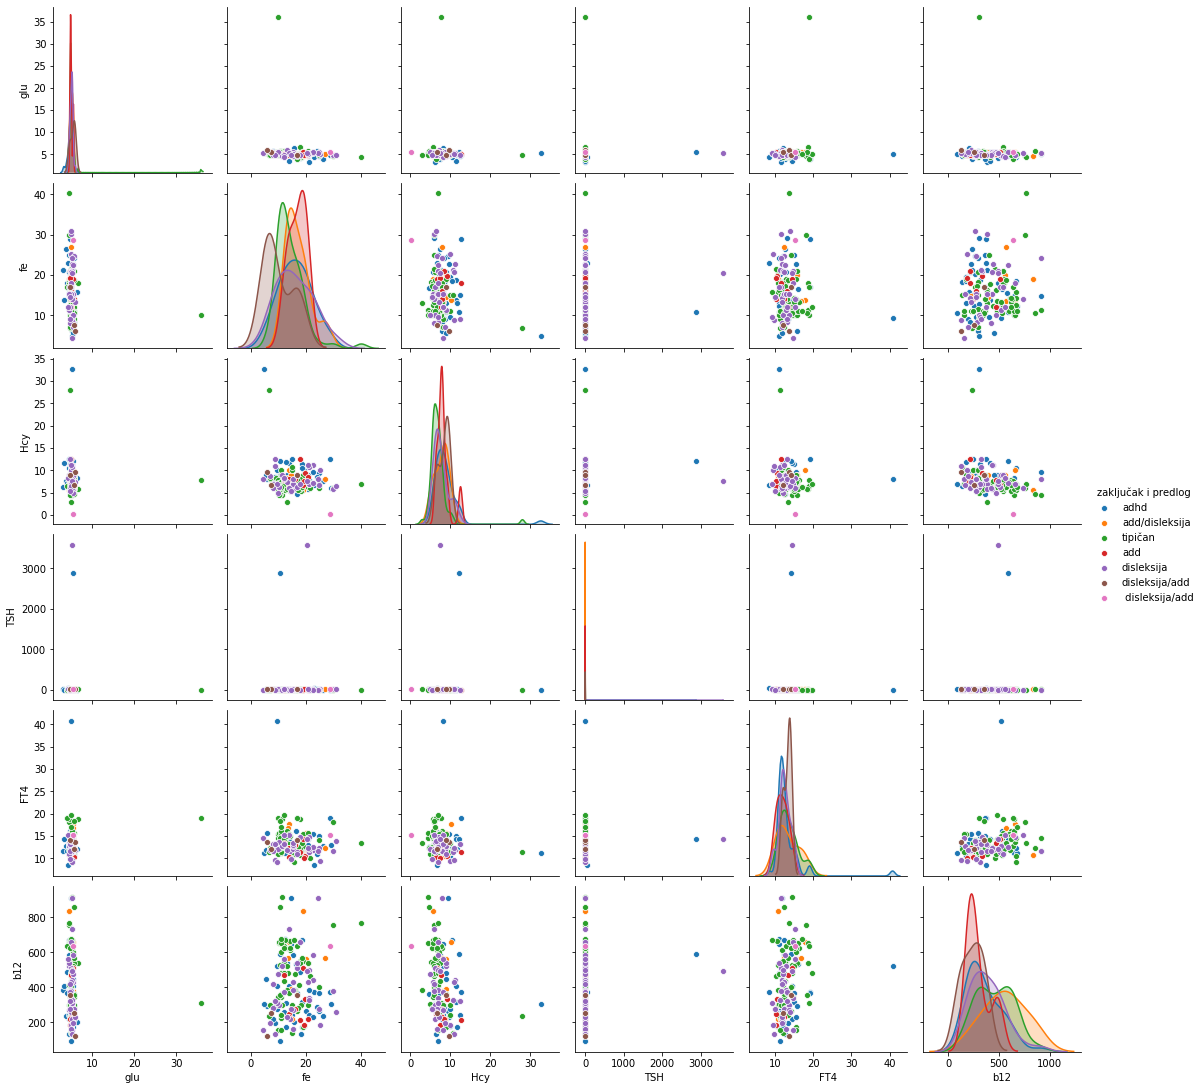

In [22]:
plot_ihormoni = sns.pairplot(ihormoni, hue="zaključak i predlog")
plot_ihormoni.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/hormoni_izvorni_ishodi.png")

In [23]:
italasi = dfi[['theta/beta ratio','theta mean','low alpha','high alpha', 'alpha mean', 'smr mean', 'beta 1 mean', 'beta 2 mean', 'beta 3mean', 'zaključak i predlog']]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data

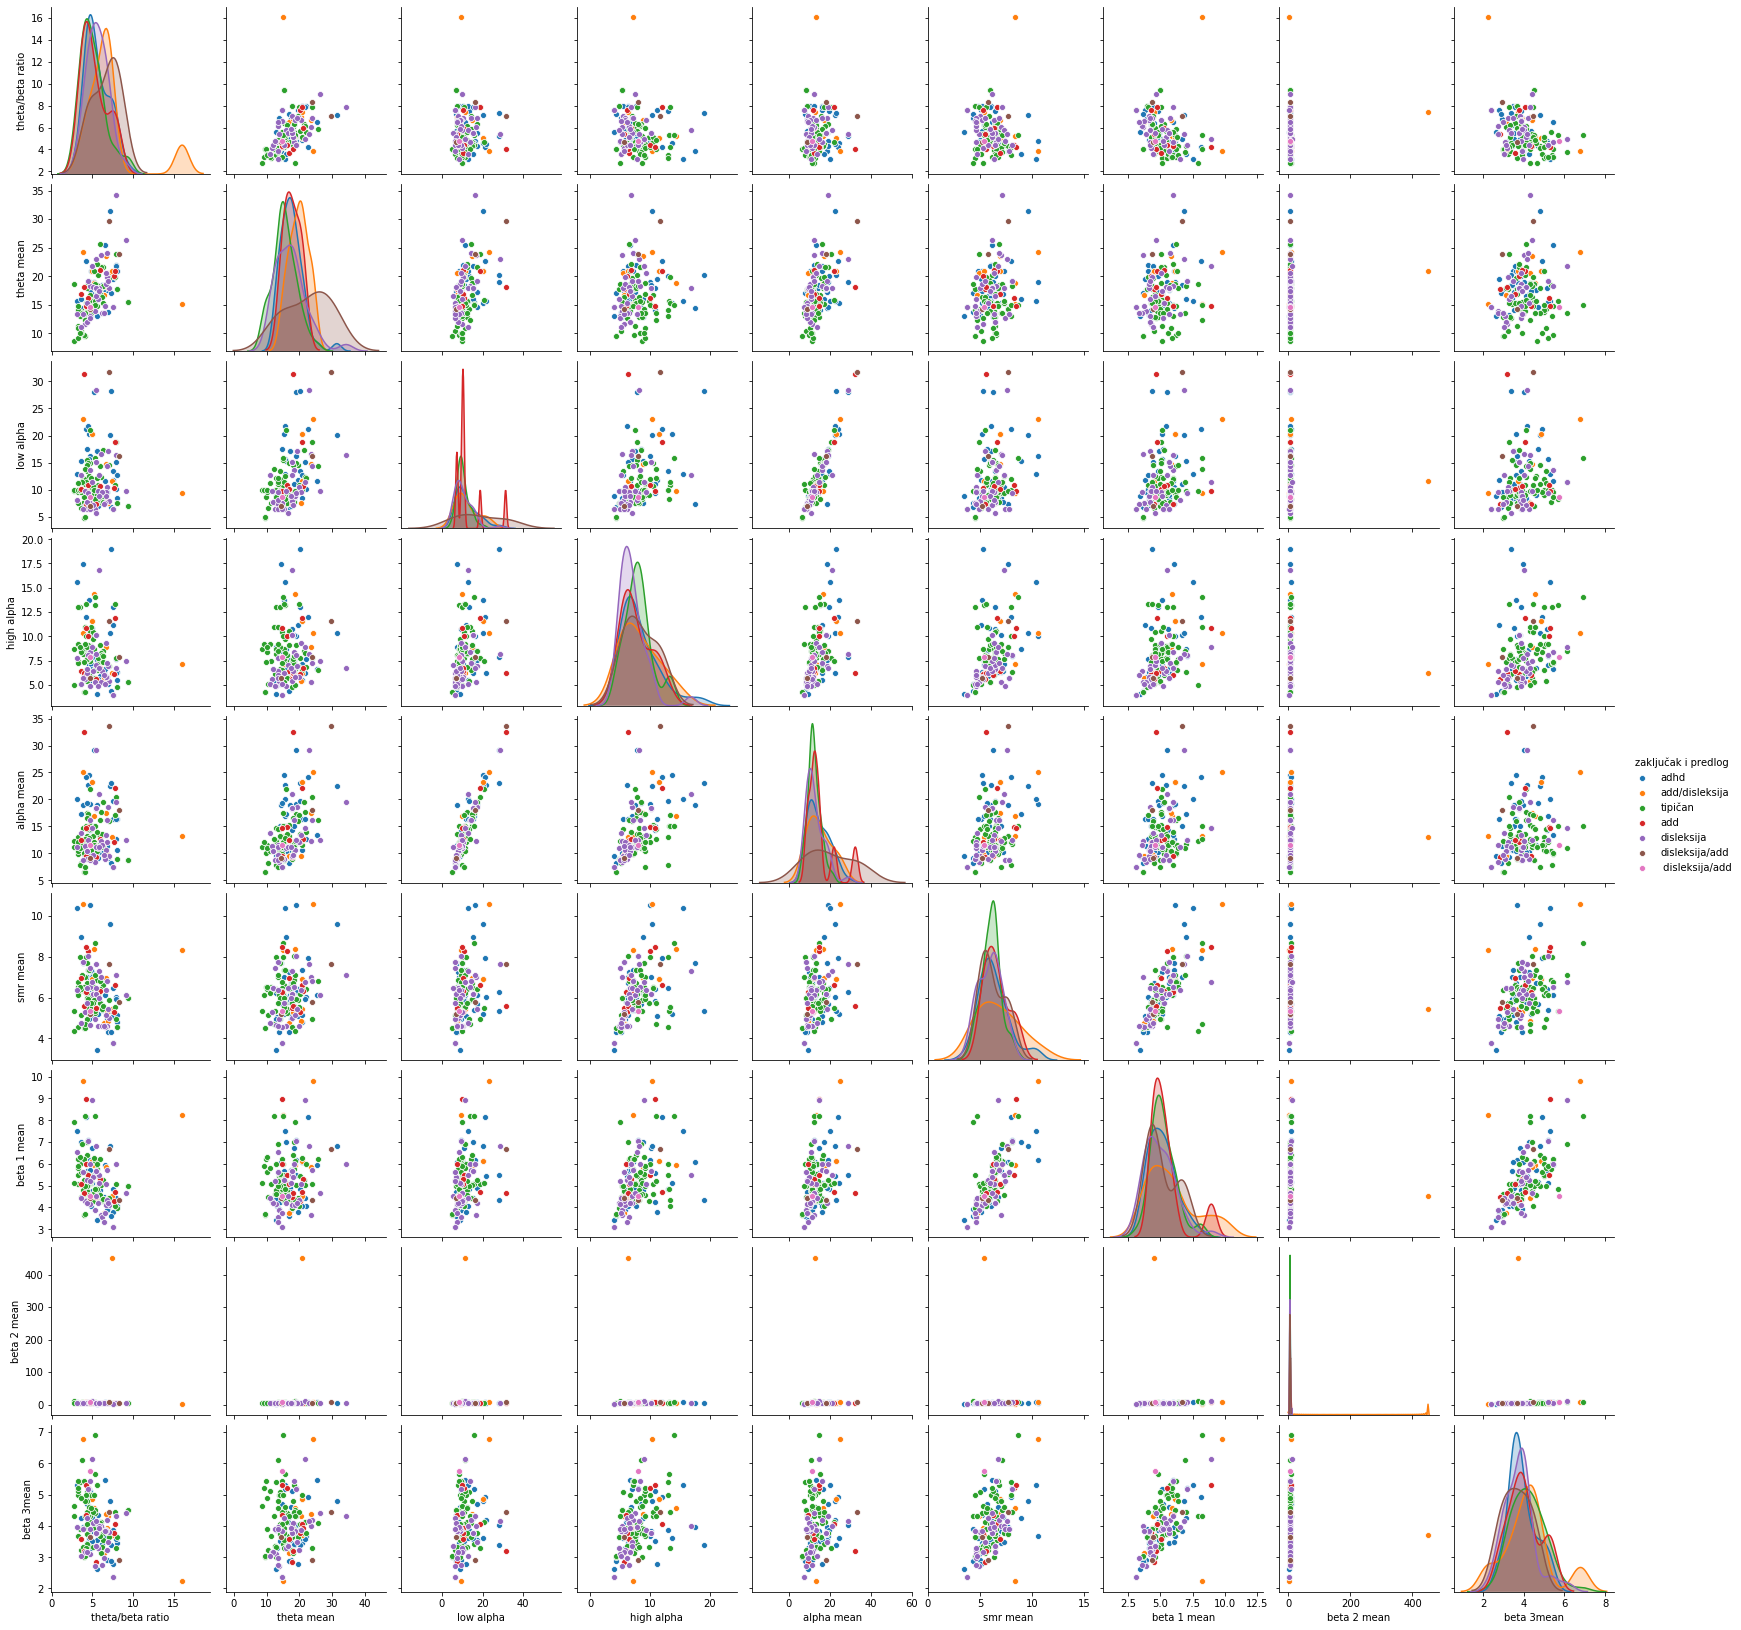

In [24]:
plot_italasi = sns.pairplot(italasi, hue="zaključak i predlog")
plot_italasi.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/talasi_izvorni_ishodi.png")

In [25]:
ikognicija = dfi[['adhd skor', 'trog II', 'arq (dst-j)','iqv(revisk)', 'iqnv(revisk)', 'iqt(revisk)', 'zaključak i predlog']]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


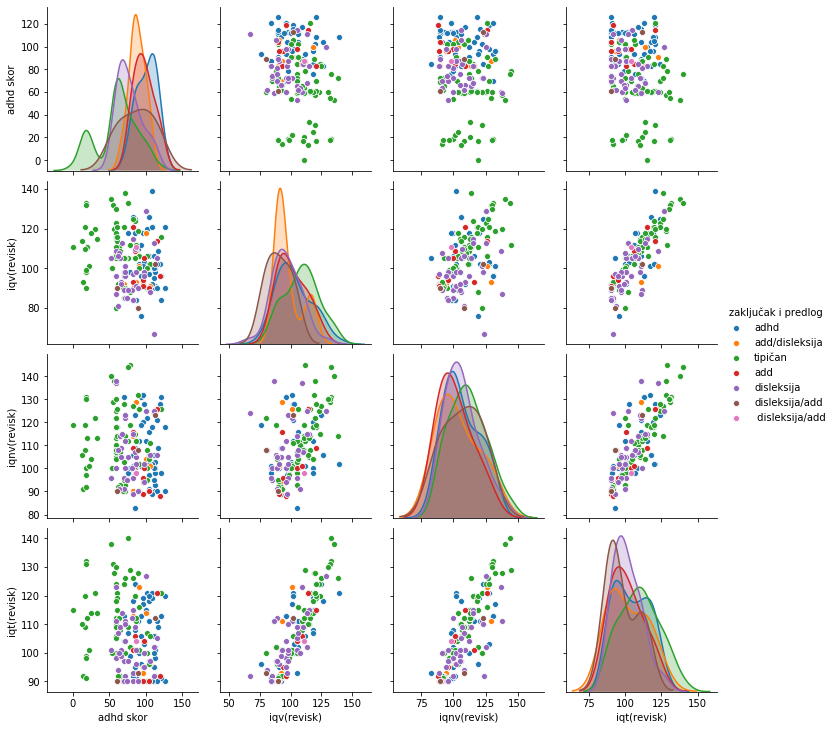

In [26]:
plot_ikognicija = sns.pairplot(ikognicija, hue="zaključak i predlog")
plot_ikognicija.savefig("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/kognicija_izvorni_ishodi.png")